In [683]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
# from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [684]:
us_airport_name = pd.read_csv('./udata/USA.csv')
loc = pd.read_csv('./udata/airports.csv')

us_airport_loc = pd.merge(loc, us_airport_name, on='Name', how='inner')
us_airport_loc.to_csv('us_airport_loc.csv', index=False)

In [685]:
us_states = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'

# create the map
map_airport = folium.Map(location=[us_airport_loc['LATITUDE'].mean(
), us_airport_loc['LONGITUDE'].mean()], zoom_start=4)

for index, row in us_airport_loc.iterrows():
    folium.CircleMarker(location=[
                        row['LATITUDE'], row['LONGITUDE']], radius=3, fill=True).add_to(map_airport)

def style_function(feature):
    return {
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.07,
        'dashArray': '5, 5'
    }

folium.GeoJson(f'{us_states}/us-states.json',
               name='US States',
               style_function=style_function).add_to(map_airport)

# display the map
map_airport


In [686]:
delay = np.load('udata/udelay.npy')
arr = delay[:, :, 0].T
dep = delay[:, :, 1].T
airport = us_airport_loc['Name'].values
print(airport)

['ABQ' 'ANC' 'ATL' 'AUS' 'BDL' 'BHM' 'BNA' 'BOS' 'BUF' 'BUR' 'BWI' 'CHS'
 'CLE' 'CLT' 'CMH' 'CVG' 'DAL' 'DCA' 'DEN' 'DFW' 'DTW' 'ELP' 'EWR' 'FLL'
 'HNL' 'HOU' 'IAD' 'IAH' 'IND' 'JAX' 'JFK' 'LAS' 'LAX' 'LGA' 'MCI' 'MCO'
 'MDW' 'MEM' 'MIA' 'MKE' 'MSP' 'MSY' 'OAK' 'OGG' 'OKC' 'OMA' 'ONT' 'ORD'
 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'RDU' 'RIC' 'RNO' 'RSW' 'SAN' 'SAT' 'SEA'
 'SFO' 'SJC' 'SJU' 'SLC' 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS']


In [687]:
OD = np.load('udata/od_pair.npy')
print(OD.shape)
print(OD)

(70, 70)
[[   0. 7575. 6731. ... 3390.  871. 3580.]
 [7505.    0. 7390. ... 1543.  945. 1275.]
 [6739. 7402.    0. ... 1986. 2999.  985.]
 ...
 [3388. 1451. 1979. ...    0.    0.    0.]
 [ 868.  945. 2985. ...    0.    0.    0.]
 [3581. 1262.  973. ...    0.    0.    0.]]


In [688]:
weather_data = np.load("udata/weather2016_2021.npy")
print(weather_data.shape)
print(weather_data)

(70, 78912)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [689]:

def plot_shapefile():
    file_path = 'States_shapefile-shp/States_shapefile.shp'
    gdf = gpd.read_file(file_path)
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.7)
    ax.set_axis_off()


def plot_airport():
    # plot the data
    plt.scatter(us_airport_loc['LONGITUDE'], us_airport_loc['LATITUDE'], s=15)


def plot_OD():
    for i in range(OD.shape[0]):
        for j in range(OD.shape[1]):
            if OD[i, j] > 0:
                origin = us_airport_loc.iloc[i]
                destination = us_airport_loc.iloc[j]
                flow = OD[i, j]
                plt.plot([origin['LONGITUDE'], destination['LONGITUDE']],
                         [origin['LATITUDE'], destination['LATITUDE']],
                         linewidth=flow/10000, alpha=0.5)

In [690]:
route_counts = {}

# iterate over each row and column of the OD array
for i in range(OD.shape[0]):
    for j in range(OD.shape[1]):
        # if the element is non-zero, update the route counts
        if OD[i, j] > 0:
            origin = us_airport_loc.iloc[i]['Name']
            destination = us_airport_loc.iloc[j]['Name']
            # update the route count for the origin city
            if origin in route_counts:
                route_counts[origin] += 1
            else:
                route_counts[origin] = 1
            # update the route count for the destination city
            if destination in route_counts:
                route_counts[destination] += 1
            else:
                route_counts[destination] = 1

print(route_counts)

{'ABQ': 136, 'ANC': 130, 'ATL': 134, 'AUS': 136, 'BDL': 116, 'BHM': 122, 'BNA': 108, 'BOS': 126, 'BUF': 124, 'BUR': 126, 'BWI': 114, 'CHS': 112, 'CLE': 118, 'CLT': 108, 'CMH': 116, 'CVG': 109, 'DAL': 116, 'DCA': 80, 'DEN': 104, 'DFW': 108, 'DTW': 110, 'ELP': 98, 'EWR': 100, 'FLL': 100, 'HNL': 96, 'HOU': 108, 'IAD': 94, 'IAH': 108, 'IND': 100, 'JAX': 84, 'JFK': 102, 'LAS': 104, 'LAX': 48, 'LGA': 78, 'MCI': 96, 'MCO': 88, 'MDW': 85, 'MEM': 75, 'MIA': 68, 'MKE': 44, 'MSP': 80, 'MSY': 94, 'OAK': 98, 'OGG': 78, 'OKC': 64, 'OMA': 70, 'ONT': 80, 'ORD': 48, 'PBI': 80, 'PDX': 74, 'PHL': 50, 'PIT': 80, 'RDU': 50, 'RIC': 36, 'RNO': 50, 'RSW': 58, 'SAN': 40, 'SAT': 52, 'SEA': 56, 'SFO': 30, 'SJC': 52, 'SJU': 42, 'SLC': 38, 'SMF': 50, 'SNA': 30, 'STL': 39, 'TPA': 42, 'TUL': 30, 'TUS': 56, 'PHX': 32}


In [691]:
def plot_airport_counts():
    file_path = 'States_shapefile-shp/States_shapefile.shp'
    gdf = gpd.read_file(file_path)
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_axis_off()

    # plot the state boundaries
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.7)

    airport_counts = pd.DataFrame({'Name': list(route_counts.keys()),
                                   'Count': list(route_counts.values())})
    airport_loc_counts = pd.merge(us_airport_loc, airport_counts, on='Name')

    # create a colormap based on the airport counts
    norm = Normalize(vmin=airport_loc_counts['Count'].min(),
                     vmax=airport_loc_counts['Count'].max())
    cmap = plt.cm.get_cmap('coolwarm')
    mapper = ScalarMappable(norm=norm, cmap=cmap)


    for i, row in airport_loc_counts.iterrows():
        color = mapper.to_rgba(row['Count'])
        size = row['Count'] * 2.5
        ax.scatter(row['LONGITUDE'], row['LATITUDE'],
                   s=size, color=color, alpha=0.6)
        ax.annotate(row['Name'], (row['LONGITUDE'],
                    row['LATITUDE']), fontsize=5)

    # colorbar
    mapper.set_array(airport_loc_counts['Count'])
    cbar = fig.colorbar(mapper, shrink=0.4)
    cbar.set_label('', rotation=270, labelpad=20, fontsize=14)

/var/folders/q8/h2vz6sj57rj02qh11jbnrysh0000gn/T/ipykernel_5785/3556313825.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
/var/folders/q8/h2vz6sj57rj02qh11jbnrysh0000gn/T/ipykernel_5785/3805895568.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
/var/folders/q8/h2vz6sj57rj02qh11jbnrysh0000gn/T/ipykernel_5785/3805895568.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``m

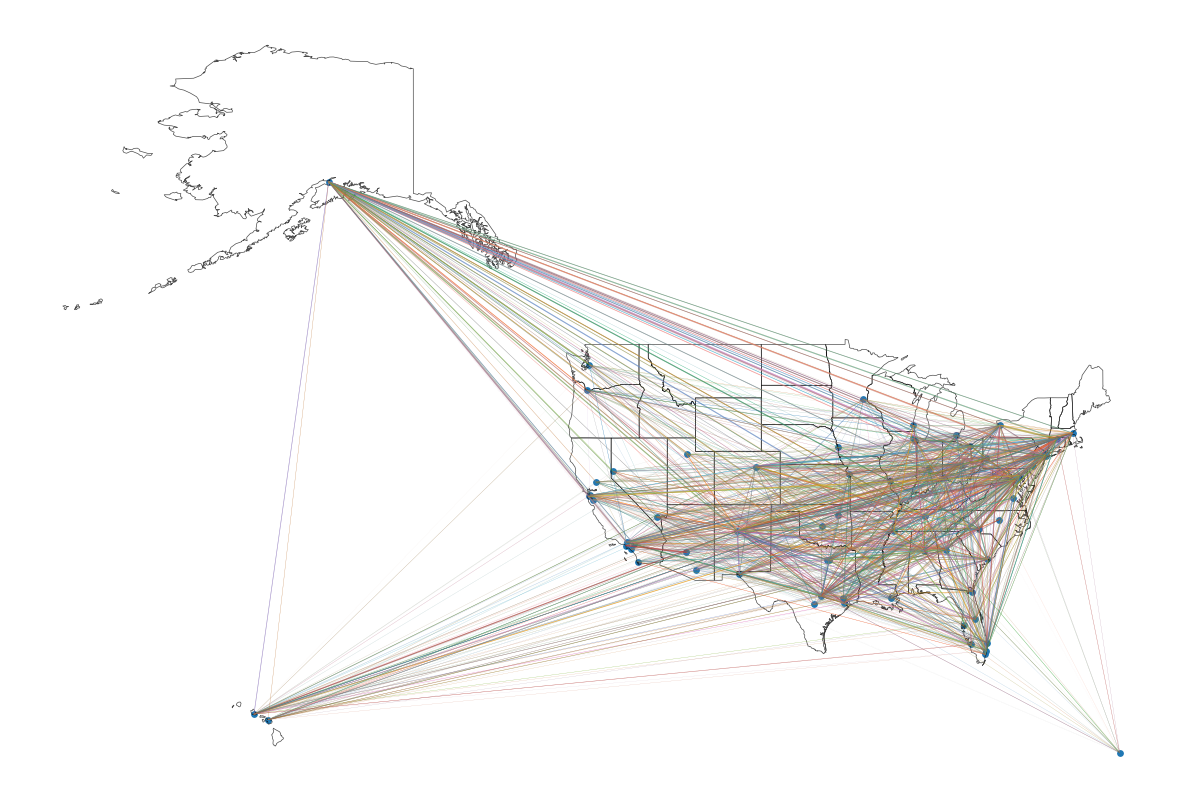

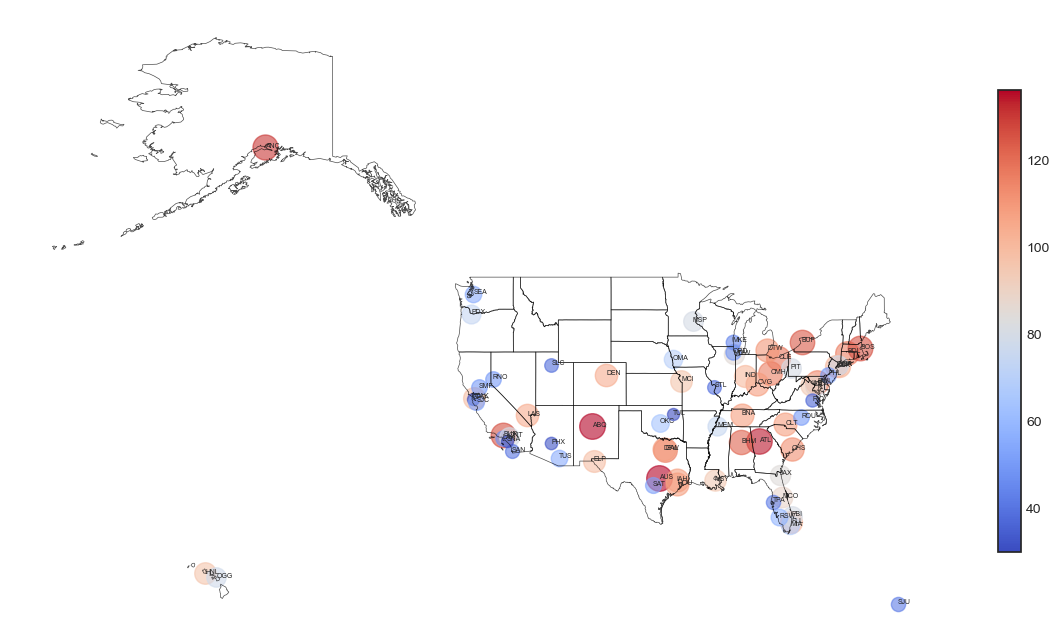

In [692]:
plot_shapefile()
plot_OD()
plot_airport()
plot_airport_counts()